In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
sheet_name = "data_after_cleaning"
df = pd.read_excel("assignment-covid-19-data-set-cleaned.xlsx",sheet_name)

In [18]:
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Australia,2020-01-22,0,0,0
1,Canada,2020-01-22,0,0,0
2,China,2020-01-22,548,17,28
3,Denmark,2020-01-22,0,0,0
4,France,2020-01-22,0,0,0


In [25]:
df.isna().sum()

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [154]:
df.shape

(13213, 5)

## Q1.Graphical representation of confirmed case trend across the globe

In [28]:
df.dtypes

Country/Region            object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [29]:
df.tail()

,Country/Region,Date,Confirmed,Deaths,Recovered
13208,MS Zaandam,2020-04-03,9,2,0
13209,Botswana,2020-04-03,4,1,0
13210,Burundi,2020-04-03,3,0,0
13211,Sierra Leone,2020-04-03,2,0,0
13212,Malawi,2020-04-03,3,0,0


In [41]:
daily_data = df.groupby('Date').sum()
daily_data.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


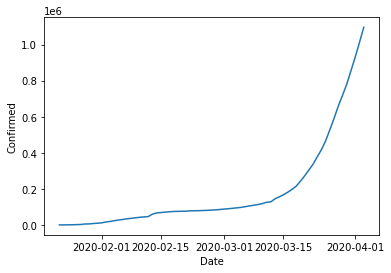

In [43]:
sns.lineplot(x="Date", y="Confirmed",data=daily_data)
plt.show()

### Q2.Graphical representation of confirmed case trend in following countries (China, US, Italy, Spain, Germany, Iran, France, South Korea, United Kingdom & Switzerland)

In [65]:
country = ['China','US','Italy','Spain', 
           'Germany','Iran','France','South Korea','United Kingdom','Switzerland']

In [62]:
ch = df[df['Country/Region'] == 'China']
ch.head()

,Country/Region,Date,Confirmed,Deaths,Recovered
2,China,2020-01-22,548,17,28
183,China,2020-01-23,643,18,30
364,China,2020-01-24,920,26,36
545,China,2020-01-25,1406,42,39
726,China,2020-01-26,2075,56,49


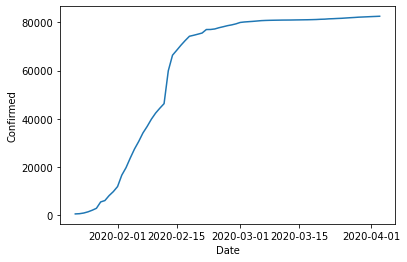

In [63]:
sns.lineplot(x="Date", y="Confirmed",data=ch)#The graph show only chines confirmed case
plt.show()

In [70]:
country_df = df[df['Country/Region'].isin(country)]
country_df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered
2,China,2020-01-22,548,17,28
4,France,2020-01-22,0,0,0
6,United Kingdom,2020-01-22,0,0,0
62,Germany,2020-01-22,0,0,0
75,Iran,2020-01-22,0,0,0


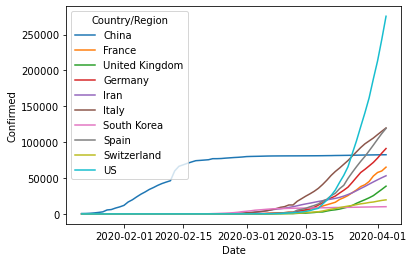

In [71]:
sns.lineplot(x="Date", y="Confirmed",hue ="Country/Region",data=country_df)
plt.show()

## Q3.Top 5 countries with highest confirmed cases in each month

In [145]:
df['Country/Region'] = df['Date'].astype(str)

In [146]:
df =df.rename({"Country/Region":"Country_Region"}, axis='columns').head()

In [155]:
df['Date'] =  pd.to_datetime(df['Date'], format='%d%b%Y:%H:%M:%S.%f')

In [158]:
df.dtypes

Country/Region            object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [165]:
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Month,Day
0,Australia,2020-01-22,0,0,0,1,22
1,Canada,2020-01-22,0,0,0,1,22
2,China,2020-01-22,548,17,28,1,22
3,Denmark,2020-01-22,0,0,0,1,22
4,France,2020-01-22,0,0,0,1,22


In [160]:
df["Month"] = df['Date'].dt.month

In [166]:
df.shape

(13213, 7)

In [163]:
df["Day"] = df['Date'].dt.day

In [142]:
df.head(20)

,Country_Region,Date,Confirmed,Deaths,Recovered,Country/Region,Month,Day
0,Australia,2020-01-22,0,0,0,2020-01-22,1,22
1,Canada,2020-01-22,0,0,0,2020-01-22,1,22
2,China,2020-01-22,548,17,28,2020-01-22,1,22
3,Denmark,2020-01-22,0,0,0,2020-01-22,1,22
4,France,2020-01-22,0,0,0,2020-01-22,1,22


In [170]:
new_data = df.groupby(["Month"]).sum()
new_data.head()

,Confirmed,Deaths,Recovered,Day
Month,,,,
1,38534,889,844,47965
2,1673291,46898,380749,78735
3,8894058,386210,2702183,89776
4,3041675,158579,624002,1086


## Q4.Top 5 Countries with highest rate of increase in each month